 ## 5. Types of Waveforms in WDF

Although WDFs are based on *waves*, these waves are derived from traditional physical variables:

| Domain     | Variable         | Typical Use                     |
|------------|------------------|---------------------------------|
| Voltage    | $v(t)$           | Analog modeling, passive ports  |
| Current    | $i(t)$           | Source modeling, feedback ports |
| Power      | $p(t) = v(t)i(t)$ | Energy flow, passivity check    |
| Waves      | $a(t), b(t)$     | Simulation variables in WDF     |

In WDFs, we **encode the behavior** of analog components using $(a, b)$ — which are **derived** from either voltage/current or power variables.

The wave domain is used for **numerical computation**, but still retains the physical meaning.


## 6. Upstream vs Downstream Ports

In WDFs, components are **connected in a tree structure** (more on that below). In this structure:

- **Upstream**: from the output of a child toward the parent node.
- **Downstream**: from the parent node toward its children.

Every **port** sends and receives waves:
- An **incident wave** ($a$) is received *from upstream*
- A **reflected wave** ($b$) is sent *back downstream*

These directions matter when defining **adaptors**, which compute scattering relationships.


##  7. The WDF Connection Tree

All WDF topologies are structured as **trees**, not general graphs.

This is essential to:

- Avoid **delay-free loops** (algebraic loops with no time evolution)
- Define a consistent **wave propagation order**
- Enable **real-time, sample-by-sample computation**

A WDF **tree** has:

- **Leaf nodes**: basic components (resistors, capacitors, inductors…)
- **Internal nodes**: adaptors (series, parallel, multiport)
- **Root node**: a special source or adaptor where the system is driven



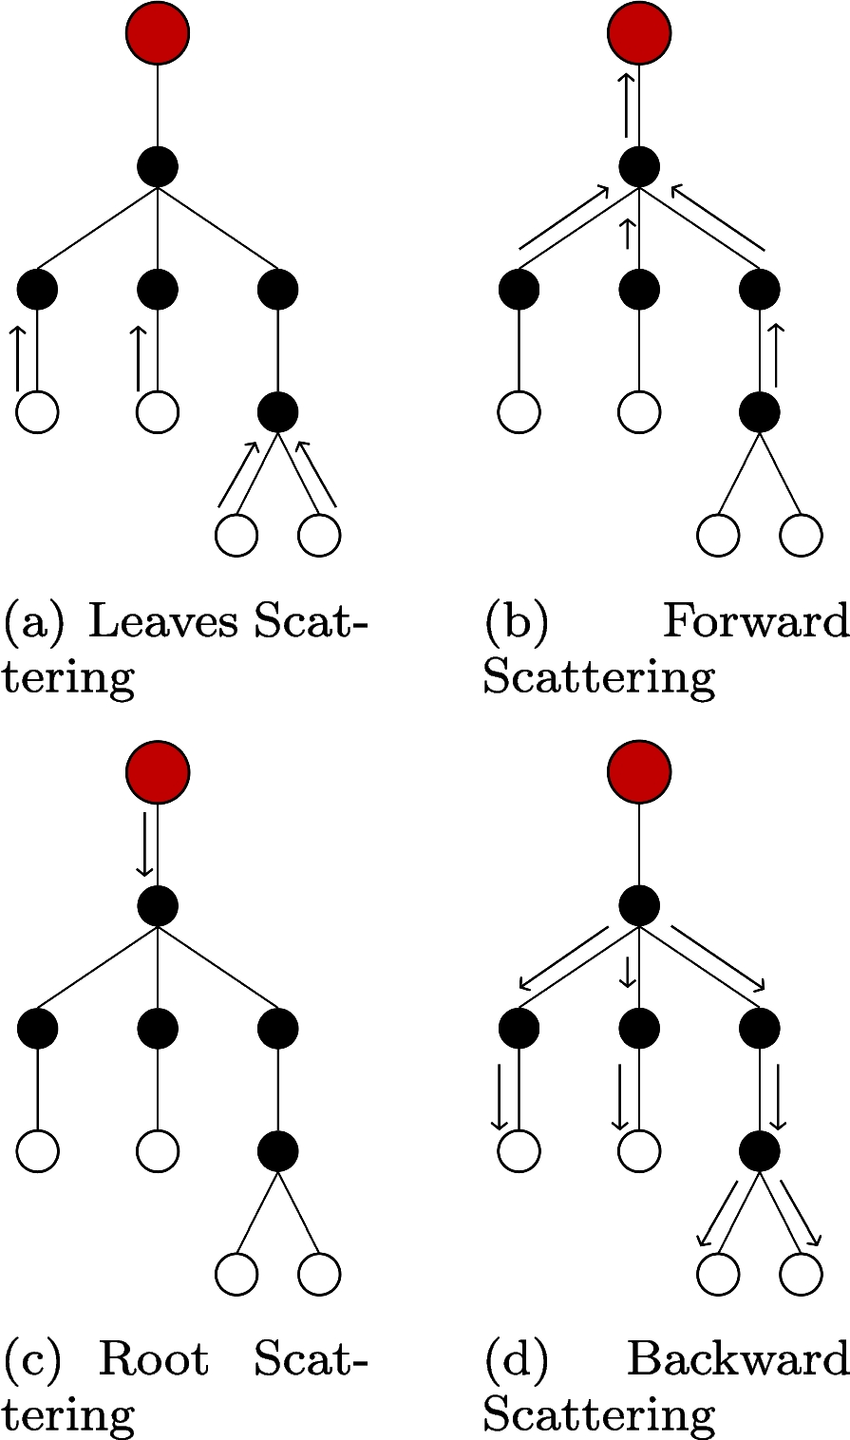

## 8. Delay-Free Loops and Realizability

A **delay-free loop** occurs when two or more components are connected such that:

- The output of one directly depends on the input of another
- And vice versa — all **in the same time step**

This leads to an **algebraic loop**, meaning we must solve simultaneous equations *without* knowing prior values.

In discrete-time systems, **this is not realizable** in a causal implementation.

To ensure realizability, WDFs enforce **at least one unit delay** along any closed feedback path.


##  9. Avoiding Delay-Free Loops with the Connection Tree

WDFs avoid delay-free loops by enforcing:

1. A **hierarchical structure** (tree, not cyclic graph)
2. A clear **wave propagation schedule**:
   - Compute reflected wave $b$ first (upstream pass)
   - Compute incident wave $a$ next (downstream pass)
3. At least one delay in reactive loops (e.g. capacitors, inductors)

In practice:

- Capacitors and inductors are **discretized** with methods like **trapezoidal integration** or **Tustin’s method**, which introduces implicit delays.
- Delay elements (z⁻¹) are inserted to break cycles.


## 10. What Does "Realizability" Mean?

A system is **realizable** if it can be implemented in real-time, i.e., each output sample:

- Can be computed **from known values** of the current and past inputs
- Does **not depend on future input** or unsolved equations at the same time step

In WDF, realizability is guaranteed if:

- The connection graph is acyclic (a tree)
- Each branch has well-defined port resistance $R$
- Reactive elements are properly discretized


##  11. Wave Propagation Schedule (per sample)

At each discrete time step:

1. **Reflected pass**:
   - Start from the leaves
   - Compute $b$ for each component
   - Combine at adaptors using scattering matrices

2. **Incident pass**:
   - Start from the root
   - Propagate $a$ values downward to leaves

This **two-pass system** ensures correctness and numerical stability.

Each component is only updated **once per sample**.


## Summary (Part II)

In this second half of the notebook, we explored the **discrete-time implementation structure** of WDFs:

- How wave variables are computed per sample
- The role of **connection trees** and **wave scheduling**
- Why **delay-free loops** must be avoided
- How WDFs ensure **realizability and passivity**

These are the core principles that make WDFs ideal for stable, real-time audio DSP.

In the next notebook, we will implement simple **algebraic one-port components** and test their wave-domain behavior.
